In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [45]:

#Cargamos data set2
url= 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto14/FallecidosCumulativo.csv'
df = pd.read_csv(url)
df.head()

,Region,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,2020-07-11,2020-07-12,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-18,2020-07-19,2020-07-20,2020-07-21,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15,2020-08-16,2020-08-17,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-22,2020-08-23,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-29,2020-08-30,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26,2020-09-27,2020-09-28,2020-09-29,2020-09-30,2020-10-01,2020-10-02,2020-10-03,2020-10-04,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-09,2020-10-10,2020-10-11,2020-10-12,2020-10-13,2020-10-14,2020-10-15,2020-10-16,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,2020-11-10,2020-11-11,2020-11-12,2020-11-13,2020-11-14,2020-11-15,2020-11-16,2020-11-17,2020-11-18,2020-11-19,2020-11-20,2020-11-21,2020-11-22,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27,2020-11-28,2020-11-29,2020-11-30,2020-12-01,2020-12-02,2020-12-03,2020-12-04,2020-12-05,2020-12-06,2020-12-07,2020-12-08,2020-12-09,2020-12-10,2020-12-11,2020-12-12,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,2021-01-11,2021-01-12,2021-01-13,2021-01-14,2021-01-15,2021-01-16,2021-01-17,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-01-30,2021-01-31,2021-02-01,2021-02-02,2021-02-03,2021-02-04,2021-02-05,2021-02-06,2021-02-07,2021-02-08,2021-02-09,2021-02-10,2021-02-11,2021-02-12,2021-02-13,2021-02-14,2021-02-15,2021-02-16,2021-02-17,2021-02-18,2021-02-19,2021-02-20,2021-02-21,2021-02-22,2021-02-23,2021-02-24,2021-02-25,2021-02-26,2021-02-27,2021-02-28,2021-03-01,2021-03-02,2021-03-03,2021-03-04,2021-03-05,2021-03-06,2021-03-07,2021-03-08,2021-03-09,2021-03-10,2021-03-11,2021-03-12,2021-03-13,2021-03-14,2021-03-15,2021-03-16,2021-03-17,2021-03-18,2021-03-19

In [46]:
#Se seleccionan las columnas que tienen fechas
vals= list(df.columns)[1:-1]
#Se seleccionan el resto de las columnas
ids= list(df.columns)[:1]

In [47]:

df_tidy= pd.melt(df, value_vars=vals, id_vars=ids)
df_tidy= df_tidy.rename(columns={'variable':'Fechas'})
df_tidy= df_tidy.rename(columns={'value':'Fallecidos'})
df_tidy['Fechas']=pd.to_datetime(df_tidy['Fechas'], format='%Y-%m-%d')

In [48]:
df_tidy.head()

,Region,Fechas,Fallecidos
0,Arica y Parinacota,2020-03-22,0
1,Tarapacá,2020-03-22,0
2,Antofagasta,2020-03-22,0
3,Atacama,2020-03-22,0
4,Coquimbo,2020-03-22,0


In [49]:
#Usamos los fallecidos totales en Chile por fecha

df = df_tidy.groupby('Fechas')['Fallecidos'].sum().reset_index()

df.head()

,Fechas,Fallecidos
0,2020-03-22,2
1,2020-03-23,2
2,2020-03-24,4
3,2020-03-25,6
4,2020-03-26,8


In [50]:

df['Fallecidos_Nuevos'] = df['Fallecidos'].diff()

# Rellenar los valores NaN con 0
df['Fallecidos_Nuevos'] = df['Fallecidos_Nuevos'].fillna(0)
# Obtener el número de fallecidos nuevos en la primera fecha
df.loc[0, 'Fallecidos_Nuevos'] = df.loc[0, 'Fallecidos']



In [51]:
# 1) Inspeccionar los datos
df.head()


,Fechas,Fallecidos,Fallecidos_Nuevos
0,2020-03-22,2,2.0
1,2020-03-23,2,0.0
2,2020-03-24,4,2.0
3,2020-03-25,6,2.0
4,2020-03-26,8,2.0


In [52]:
# Establecer opciones de formato para mostrar el DataFrame completo
pd.set_option('display.max_columns', 10)  # Mostrar todas las columnas
pd.set_option('display.max_rows', 10)  # Mostrar todas las filas
df.head()

,Fechas,Fallecidos,Fallecidos_Nuevos
0,2020-03-22,2,2.0
1,2020-03-23,2,0.0
2,2020-03-24,4,2.0
3,2020-03-25,6,2.0
4,2020-03-26,8,2.0


In [53]:
negativos= df.loc[df["Fallecidos_Nuevos"]<0]
negativos
#Tenemos un dato mal sumado

,Fechas,Fallecidos,Fallecidos_Nuevos
1100,2023-03-27,121953,-7039.0


In [54]:
df.loc[1100:, 'Fallecidos'] += 7039
df.head()

,Fechas,Fallecidos,Fallecidos_Nuevos
0,2020-03-22,2,2.0
1,2020-03-23,2,0.0
2,2020-03-24,4,2.0
3,2020-03-25,6,2.0
4,2020-03-26,8,2.0


In [55]:
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
df.head()

,Fechas,Fallecidos,Fallecidos_Nuevos
0,2020-03-22,2,2.0
1,2020-03-23,2,0.0
2,2020-03-24,4,2.0
3,2020-03-25,6,2.0
4,2020-03-26,8,2.0


In [56]:
df['Fallecidos_Nuevos'] = df['Fallecidos'].diff()

# Rellenar los valores NaN con 0
df['Fallecidos_Nuevos'] = df['Fallecidos_Nuevos'].fillna(0)
# Obtener el número de fallecidos nuevos en la primera fecha
df.loc[0, 'Fallecidos_Nuevos'] = df.loc[0, 'Fallecidos']
df.head()

,Fechas,Fallecidos,Fallecidos_Nuevos
0,2020-03-22,2,2.0
1,2020-03-23,2,0.0
2,2020-03-24,4,2.0
3,2020-03-25,6,2.0
4,2020-03-26,8,2.0


In [57]:
# 2) Manejar datos faltantes
#Inspeccionamos datos faltantes nuevamente
datos_faltantes = df.isna().sum()
print(datos_faltantes)
#Ya no hay datos faltantes

Fechas               0
Fallecidos           0
Fallecidos_Nuevos    0
dtype: int64


In [58]:
# 3) Convertir tipos de datos

df['Fechas']=pd.to_datetime(df['Fechas'], format='%Y-%m-%d')

In [59]:
# 4)Calcular estadisticas basicas

media_fallecidos = df['Fallecidos_Nuevos'].mean()
media_fallecidos

109.66807076663858

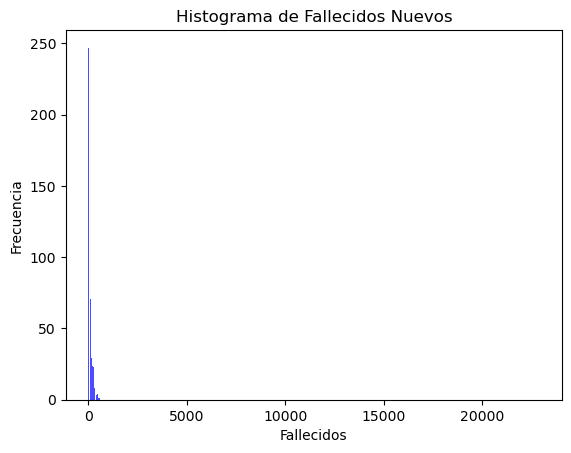

In [60]:
#5) Crear Histograma
plt.hist(df['Fallecidos_Nuevos'], bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.xlabel('Fallecidos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Fallecidos Nuevos')
plt.xlim=(0,200)
plt.show()

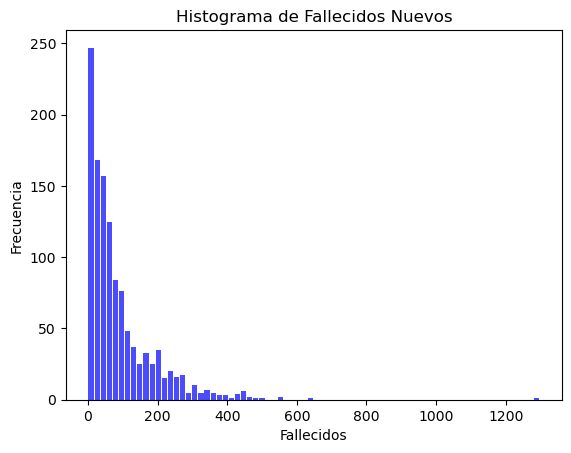

In [61]:
#5) Crear Histograma: Enfatizamos donde se concentra la mayor distribucion de valores.(Evitar Outliers)
df_filtrado = df[df['Fallecidos_Nuevos'] <= 2000]
plt.hist(df_filtrado['Fallecidos_Nuevos'], bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.xlabel('Fallecidos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Fallecidos Nuevos')
plt.xlim=(0,200)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x600 with 0 Axes>

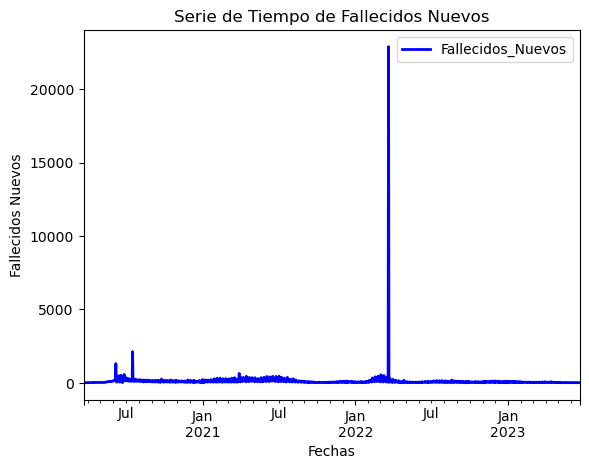

In [62]:
#Series de tiempo

plt.figure(figsize=(10, 6))  # Establecer el tamaño de la figura
df.plot(x='Fechas', y='Fallecidos_Nuevos', color='blue', linewidth=2)


plt.xlabel('Fechas')
plt.ylabel('Fallecidos Nuevos')
plt.title('Serie de Tiempo de Fallecidos Nuevos')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x600 with 0 Axes>

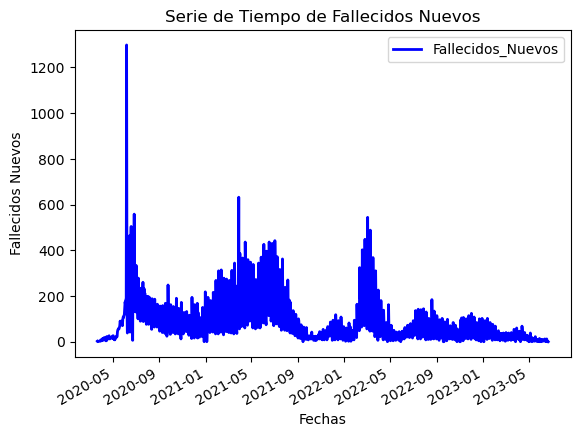

In [63]:
#Serie de tiempo:  Enfatizamos donde se concentra la mayor distribucion de valores.(Evitar Outliers)

plt.figure(figsize=(10, 6))  # Establecer el tamaño de la figura
df_filtrado.plot(x='Fechas', y='Fallecidos_Nuevos', color='blue', linewidth=2)

# Agregar etiquetas y título
plt.xlabel('Fechas')
plt.ylabel('Fallecidos Nuevos')
plt.title('Serie de Tiempo de Fallecidos Nuevos')
plt.legend()
plt.show

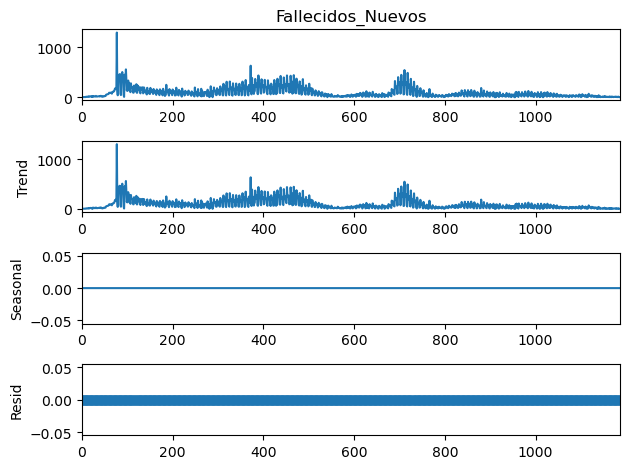

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descompone una columna de series temporales
descomposicion = seasonal_decompose(df_filtrado['Fallecidos_Nuevos'],
                                    model='additive', period=1)
descomposicion.plot()
plt.show()

In [65]:
df_filtrado.head()

,Fechas,Fallecidos,Fallecidos_Nuevos
0,2020-03-22,2,2.0
1,2020-03-23,2,0.0
2,2020-03-24,4,2.0
3,2020-03-25,6,2.0
4,2020-03-26,8,2.0


In [66]:
from statsmodels.tsa.arima.model import ARIMA

# Crear y ajustar un modelo ARIMA
modelo = ARIMA(df['Fallecidos_Nuevos'], order=(5, 1, 0))
modelo_ajustado = modelo.fit()
print(modelo_ajustado.summary())

                               SARIMAX Results                                
Dep. Variable:      Fallecidos_Nuevos   No. Observations:                 1187
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -9485.669
Date:                Sun, 02 Jul 2023   AIC                          18983.337
Time:                        17:01:21   BIC                          19013.807
Sample:                             0   HQIC                         18994.822
                               - 1187                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8378      0.005   -153.934      0.000      -0.848      -0.827
ar.L2         -0.6763      0.007    -97.126      0.000      -0.690      -0.663
ar.L3         -0.4998      0.007    -67.125      0.0